In [1]:
%load_ext autoreload
%autoreload 2

# Data Download

In [213]:
from data_querier import DataQuerierYF
from config import load_config


configuration = load_config()
data_getter = DataQuerierYF(configuration)

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


# Equally weighted

In [1]:
from equally_weighted import EquallyWeighted
from config import load_config


configuration = load_config()
portfolio = EquallyWeighted(configuration)

Preprocessing 336
Preprocessing dropped the following stocksCARR-BF.B-OTIS-CTVA-MRNA-FOX-BRK.B-FOXA-DOW-OGN-CDAY


<AxesSubplot: title={'center': 'Cumulative returns of the equally weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

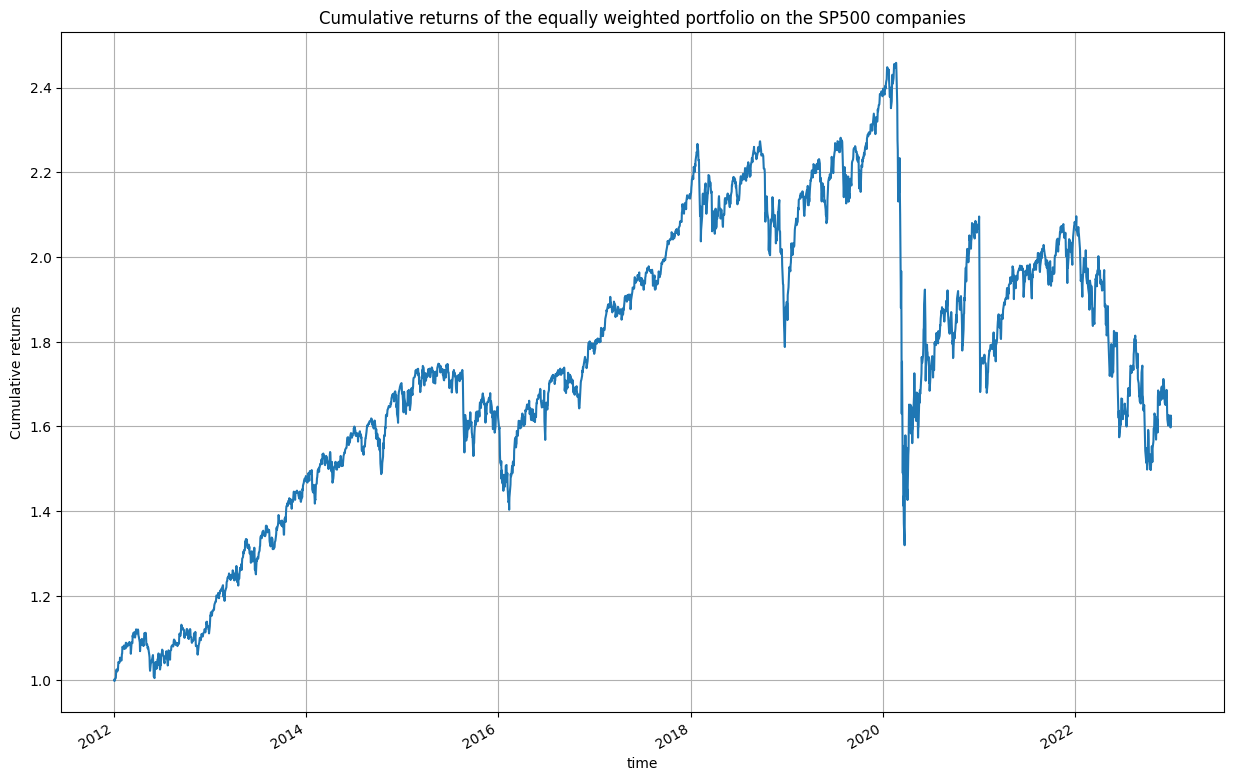

In [2]:
equal = portfolio()
equal.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the equally weighted portfolio on the SP500 companies", figsize=(15, 10)) 

# Market weights

In [3]:
from market_weights import MarketWeighted
from config import load_config

configuration = load_config()
portfolio = MarketWeighted(configuration)


Loading library list...
Done
      permco ticker
0     8045.0   ORCL
1     8048.0   MSFT
2     8087.0   TROW
3    22168.0    HON
4    20207.0    ADM
..       ...    ...
390  52978.0     PM
391  52983.0      V
392  52985.0    AWK
393  52996.0    FRC
394   7267.0    UNH

[395 rows x 2 columns]


C:\Users\user\Desktop\stock_clustering\market_weights.py:47: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  filter(lambda x: len(x[1]) > 120, # some are missing certain dates
100%|███████████████████████████████████████████████████████████████████████████████| 189/189 [00:01<00:00, 137.95it/s]


<AxesSubplot: title={'center': 'Cumulative returns of the market weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

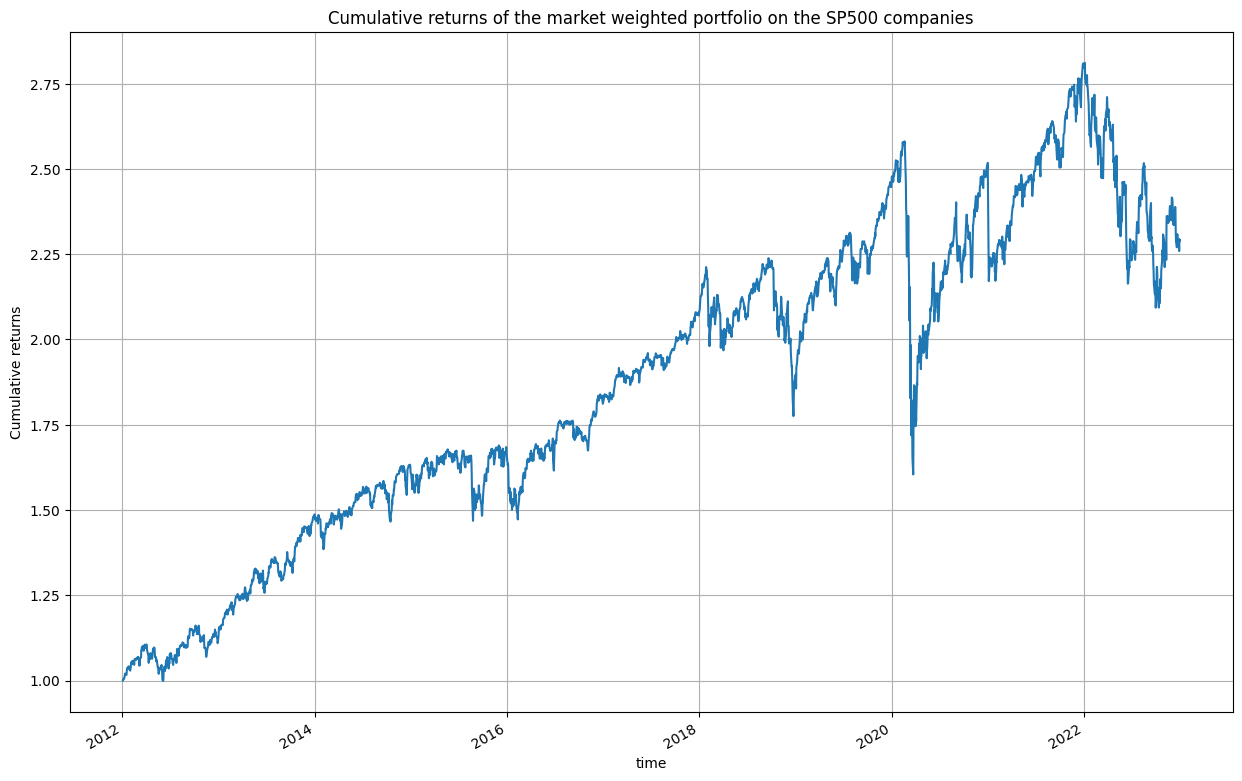

In [4]:
market = portfolio()
market.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the market weighted portfolio on the SP500 companies", figsize=(15, 10))

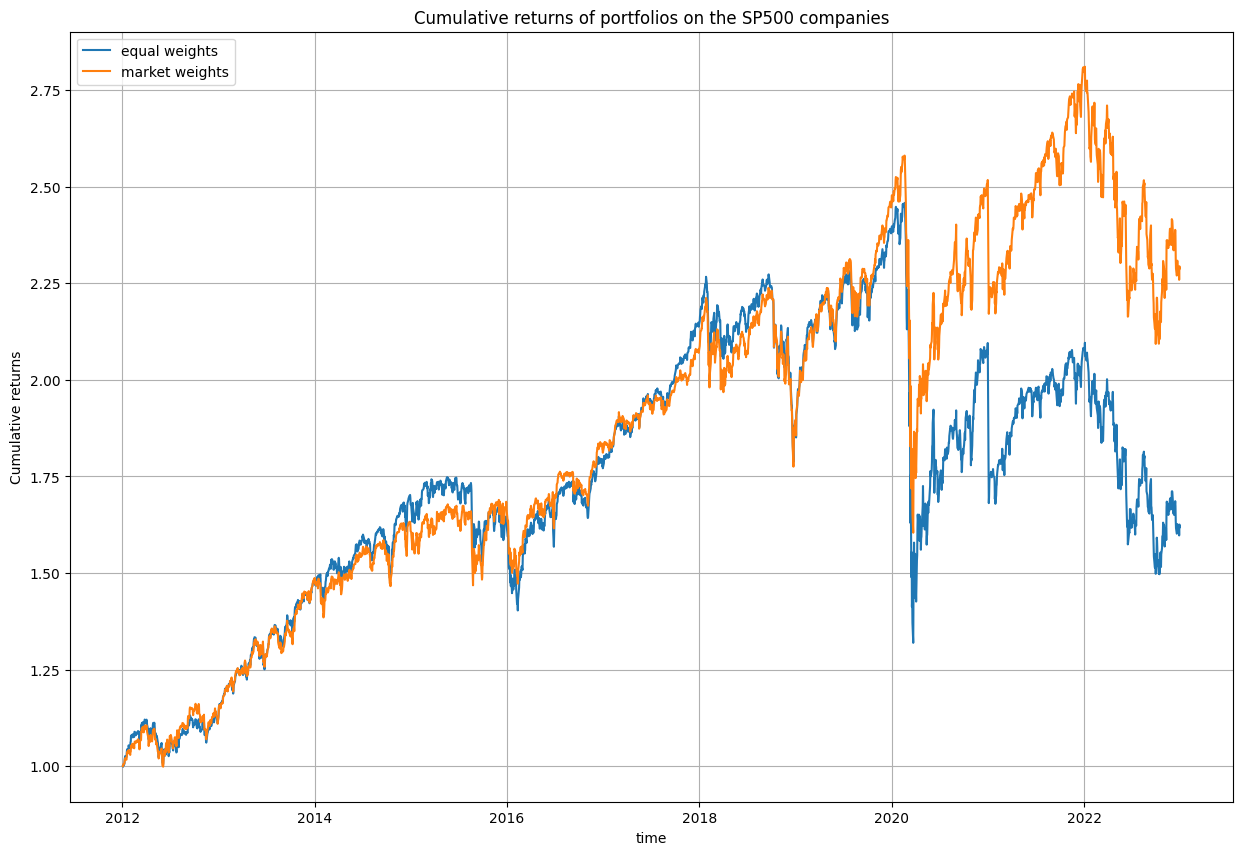

In [5]:
import matplotlib.pyplot as plt 


plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(equal, label="equal weights")
plt.plot(market, label="market weights")
#plt.plot(a_, label="markowitz portfolio")
#aversions["equal weights"] = equal
#aversions["market weights"] = market
#aversions[["risk aversion 2.0", "market weights", "equal weights"]].plot()
plt.xlabel("time")
plt.ylabel("Cumulative returns")
plt.title("Cumulative returns of portfolios on the SP500 companies")
plt.grid()
plt.legend()



# Markowitz Portfolio

Multiple Risky assets and no risk free asset:

$$ \max _w\left(w^{\prime} \mu-\frac{a}{2} w^{\prime} \Sigma w\right) \quad \text { s.t. } \quad w^{\prime} \mathbf{1}=1 $$ 

We compute our Langrangian:

$$ L(\lambda)=w^{\prime} \mu-\frac{a}{2} w^{\prime} \Sigma w+\lambda\left(1-\mathbf{1}^{\prime} w\right)  $$

Our first order condition becomes: 

$$
\frac{\partial L}{\partial w}=\mu-a \Sigma w-\lambda \mathbf{1}=0
$$
The optimal portfolio as a function of $\lambda$ is therefore:
$$
w=\frac{1}{a} \Sigma^{-1}(\mu-\lambda \mathbf{1})
$$

$\lambda$ can simply be found using the constraint $w^{\prime} \mathbf{1}=1$:

$$
\frac{1}{a} 1^{\prime} \Sigma^{-1}(\mu-\lambda \mathbf{1})=1
$$
solving,
$$
\lambda=\frac{\mathbf{1}^{\prime} \Sigma^{-1} \mu-a}{\mathbf{1}^{\prime} \Sigma^{-1} \mathbf{1}}
$$

Plugging everything in we get: 

$$
w=\frac{1}{a} \Sigma^{-1}(\mu- \frac{\mathbf{1}^{\prime} \Sigma^{-1} \mu-a}{\mathbf{1}^{\prime} \Sigma^{-1} \mathbf{1}}\mathbf{1})
$$


In [1]:
from mean_variance import Markowitz 
from config import load_config


configuration = load_config()
portfolio = Markowitz(configuration, stride=10)
cum = portfolio.get_rolling_cumulative_return(parallel=True)

C:\Users\user\miniconda3\envs\fbd\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Preprocessing 336
Preprocessing dropped the following stocksCARR-OTIS-BF.B-CDAY-MRNA-FOX-DOW-FOXA-CTVA-BRK.B-OGN


100%|████████████████████████████████████████████████████████████████████████████████| 453/453 [15:04<00:00,  2.00s/it]


2768


<AxesSubplot: xlabel='Date'>

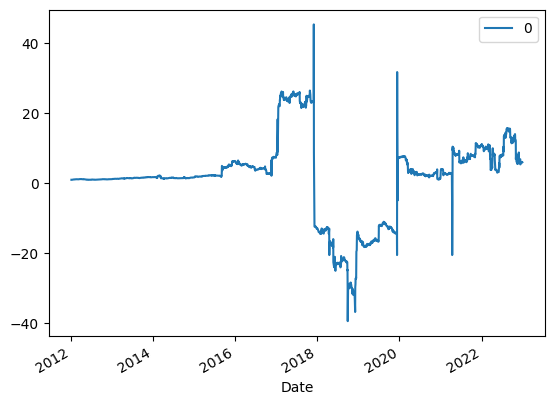

In [3]:
cum.plot()

In [1]:
from utils import compute_clean_correlation_matrix
import numpy as np

compute_clean_correlation_matrix(np.eye(10), 10, 200)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [7]:
import numpy as np
np.zeros((10,10), dtype=complex)+np.eye(10)  < 0.5


array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True, False,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True, False,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True, False,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, False,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True, False,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False]])

In [ ]:

import numpy as np
risk_aversion = 2

def optimal_weights(returns, corr): 
    inv_corr = np.linalg.inv(corr)
    ones = np.ones(returns.shape)
    lambda_constraint = ((ones.T@inv_corr@returns - risk_aversion)/(ones.T@inv_corr@ones))[0, 0]
    return (1/risk_aversion)*inv_corr@(returns - lambda_constraint*ones)
x=portfolio.data

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
print(returns.mean(axis=0).sum())
op = optimal_weights(returns.mean(axis=0).to_numpy()[:, np.newaxis], returns.corr().to_numpy())
op, op.shape, op.sum()

Text(0.5, 0, 'time')

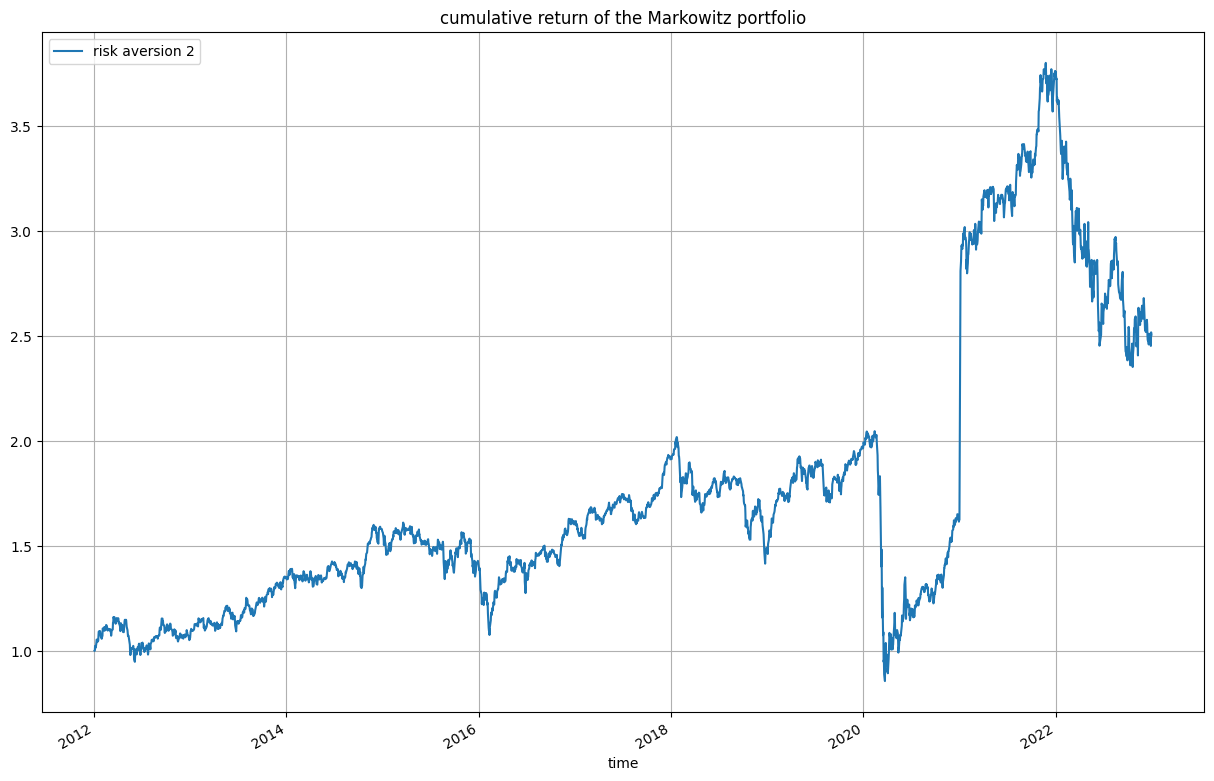

In [62]:
import matplotlib.pyplot as plt
returns = ((portfolio.data.diff()/portfolio.data) + 1).fillna(1)

a_ = pd.DataFrame(np.array(a_).reshape(-1), index=portfolio.data.index, columns=[f"risk aversion {2}"])
l.append(a_)

pd.DataFrame(a_).plot(grid=True)
plt.title("cumulative return of the Markowitz portfolio")
plt.xlabel("time")


<AxesSubplot: ylabel='Frequency'>

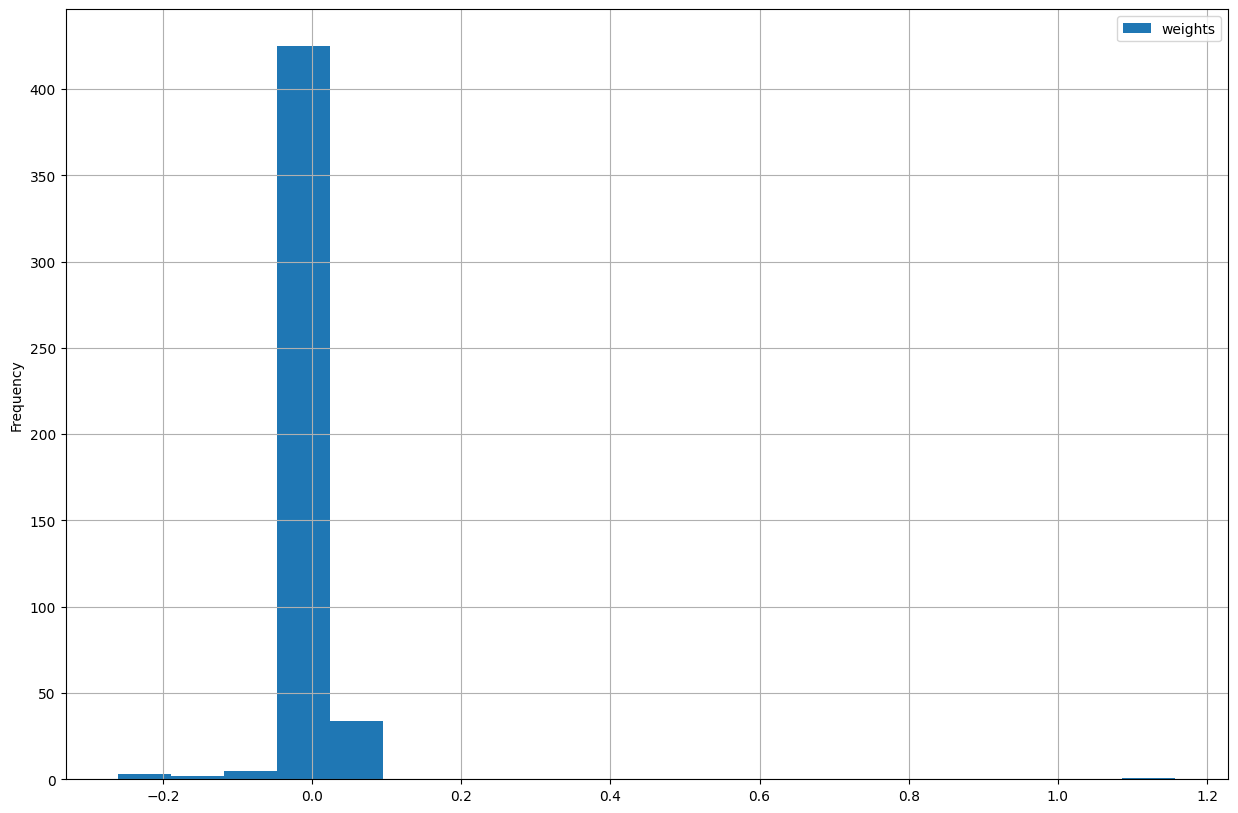

In [63]:
pd.DataFrame(op.reshape(-1, 1), columns=["weights"]).plot(kind="hist", bins=20, grid=True)

(470, 1)

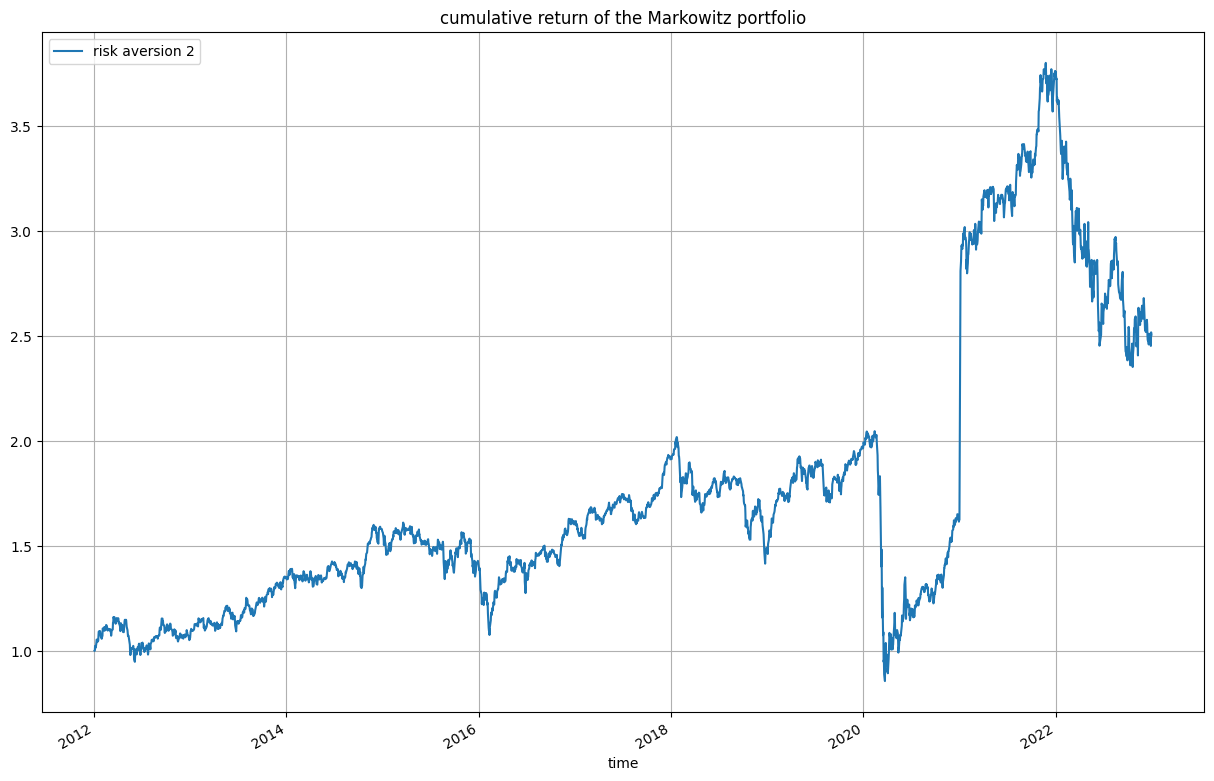

In [58]:
from utils import compute_clean_correlation_matrix
from tqdm import tqdm 
import pandas as pd

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
_returns = ((portfolio.data.diff()/portfolio.data) + 1).fillna(1)
raw_corr, clean_corr = compute_clean_correlation_matrix(returns.fillna(method="bfill"))
l = []
#for i in tqdm(2.**np.arange(-2, 4)):
risk_aversion = 2
op = optimal_weights(returns.mean(axis=0).to_numpy()[:, np.newaxis], clean_corr)
a_ = np.cumprod((_returns.to_numpy()@op))
a_ = pd.DataFrame(np.array(a_).reshape(-1), index=portfolio.data.index, columns=[f"risk aversion {2}"])
l.append(a_)

pd.DataFrame(a_).plot(grid=True)
plt.title("cumulative return of the Markowitz portfolio")
plt.xlabel("time")

op.shape

<AxesSubplot: ylabel='Frequency'>

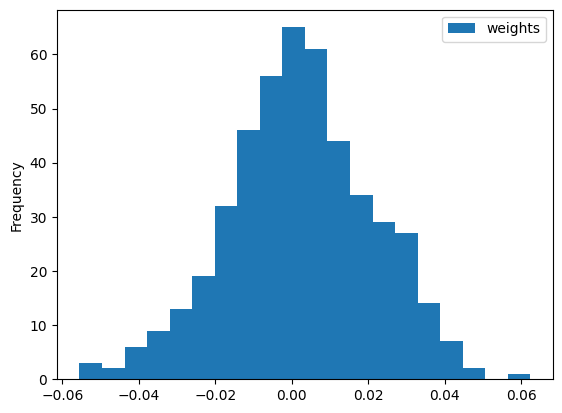

In [47]:
pd.DataFrame(op.reshape(-1, 1), columns=["weights"]).plot(kind="hist", bins=20)

In [65]:
from utils import compute_clean_correlation_matrix
from tqdm.contrib.concurrent import process_map
from tqdm import tqdm
import numpy as np

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
_returns = ((portfolio.data.diff()/portfolio.data) + 1).fillna(1)
#raw_corr, clean_corr = compute_clean_correlation_matrix(x.fillna(method="bfill"))
risk_aversion = 2
l = []
#x = portfolio.data.fillna(method="bfill")
#print(x.isna().sum().sum())

def optimal_weights(returns, corr): 
    inv_corr = np.linalg.inv(corr)
    ones = np.ones(returns.shape)
    lambda_constraint = ((ones.T@inv_corr@returns - risk_aversion)/(ones.T@inv_corr@ones))[0, 0]
    return (1/risk_aversion)*inv_corr@(returns - lambda_constraint*ones)
    
def rolling_optimal_weights(i):
#for i in tqdm(range(1500, len(_returns) - 1 + 9, 10)):
    
    raw_corr, clean_corr = compute_clean_correlation_matrix(returns[i-367:i])
    op = optimal_weights(returns.iloc[i-367:i].mean(axis=0).to_numpy()[:, np.newaxis], clean_corr)
    #a_ = np.cumprod((_returns.to_numpy()@op))
    #a_ = pd.DataFrame(np.array(a_).reshape(-1), index=portfolio.data.index, columns=[f"risk aversion {i}"])
    return np.array(op).reshape(-1)

#from multiprocessing import Pool
#from tqdm import tqdm

#with Pool(8) as p:
#    op = list(tqdm(p.imap(rolling_optimal_weights, range(1500, len(_returns) - 1 + 9, 10))))

#op =process_map(rolling_optimal_weights, range(500, len(_returns)), max_workers=2, chunksize = 100) 
op = [rolling_optimal_weights(i) for i in tqdm(range(367, len(_returns), 1), position=0, leave=True)]

100%|████████████████████████████████████████████████████████████████████████████████| 267/267 [09:14<00:00,  2.08s/it]


In [66]:

l_ = [op[0]]*368 +[weights for weights in op[1:] for _ in range(10)]
print(len(l_))
weights_rolling = np.array(l_)[:_returns.shape[0]]
weights_rolling.shape

3028


(2768, 470)

In [67]:
weights_rolling

array([[ 0.00196058+0.00000000e+00j,  0.00591341+0.00000000e+00j,
         0.00206267+0.00000000e+00j, ...,  0.00136315+0.00000000e+00j,
         0.00188005+0.00000000e+00j,  0.00171608+0.00000000e+00j],
       [ 0.00196058+0.00000000e+00j,  0.00591341+0.00000000e+00j,
         0.00206267+0.00000000e+00j, ...,  0.00136315+0.00000000e+00j,
         0.00188005+0.00000000e+00j,  0.00171608+0.00000000e+00j],
       [ 0.00196058+0.00000000e+00j,  0.00591341+0.00000000e+00j,
         0.00206267+0.00000000e+00j, ...,  0.00136315+0.00000000e+00j,
         0.00188005+0.00000000e+00j,  0.00171608+0.00000000e+00j],
       ...,
       [-0.00748441+7.55489085e-04j,  0.00165981-8.77193415e-05j,
         0.00172374+1.75133509e-04j, ...,  0.00936954-5.49899845e-03j,
         0.02245439+9.88397533e-04j, -0.01042129-7.24991358e-03j],
       [-0.00748441+7.55489085e-04j,  0.00165981-8.77193415e-05j,
         0.00172374+1.75133509e-04j, ...,  0.00936954-5.49899845e-03j,
         0.02245439+9.88397533e-04j

C:\Users\user\miniconda3\envs\fbd\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


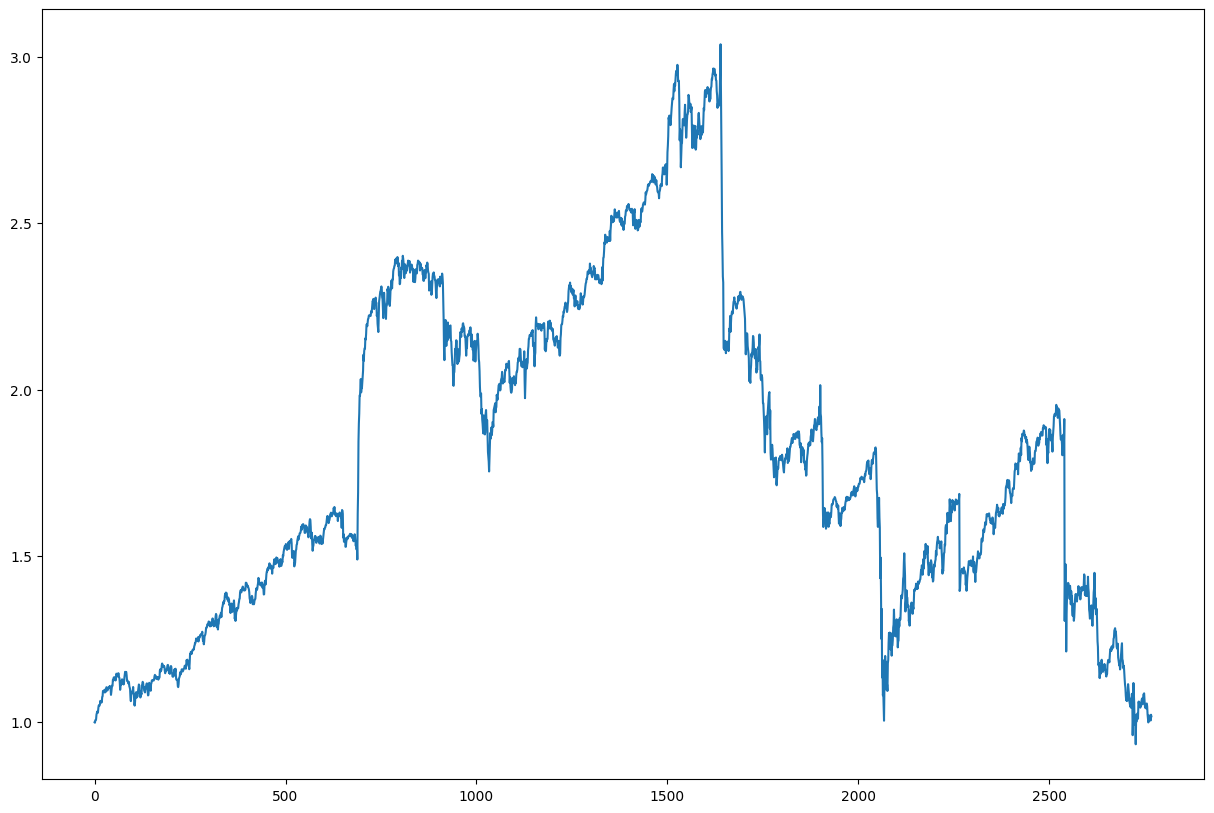

In [68]:
import matplotlib.pyplot as plt
plt.plot(np.cumprod((_returns.to_numpy()*weights_rolling).sum(axis=1)))

In [24]:
weights_rolling[1640:1650]

array([[ 2.22686679e-02,  1.86738990e-03,  2.32843963e-03, ...,
         1.36089586e-03,  4.13633094e-04,  1.00652831e-03],
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00],
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00],
       ...,
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00],
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00],
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00]])

In [31]:
portfolio.data.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2768, freq=None)

In [32]:
a_.shape

(1, 2768)

<AxesSubplot: xlabel='Date'>

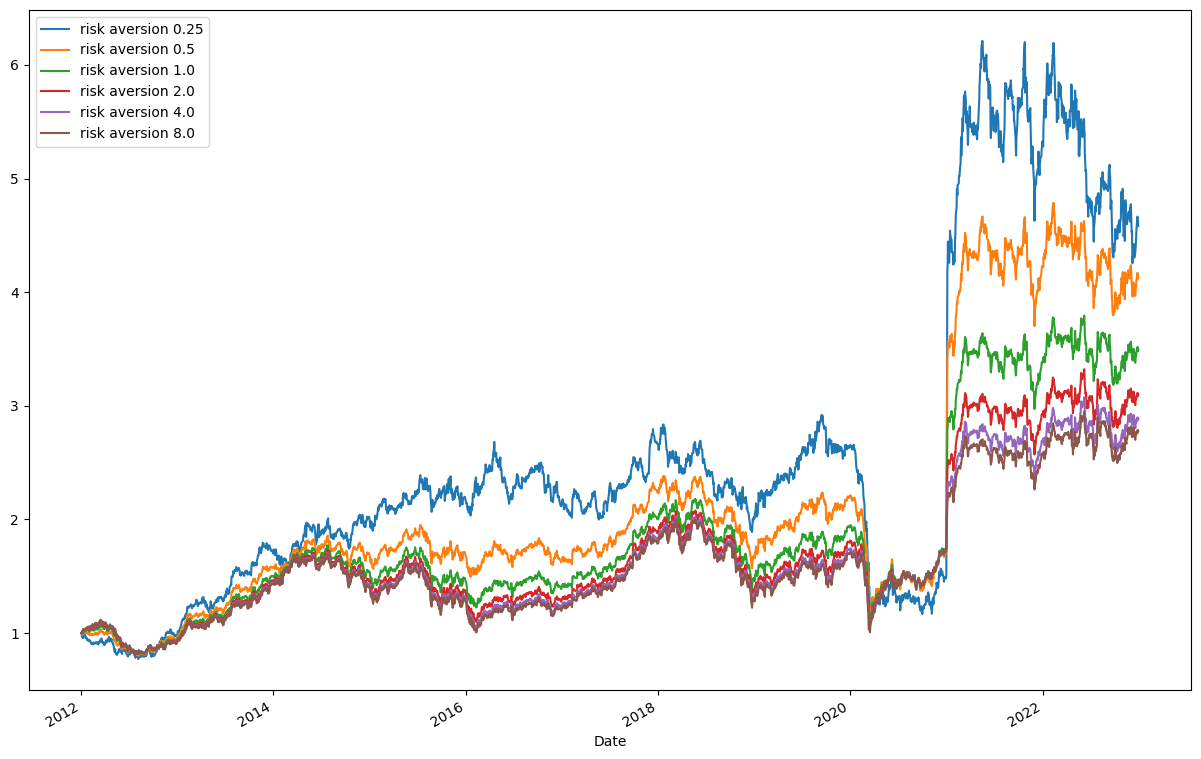

In [54]:
aversions = pd.concat(l, axis=1)
aversions.plot()

# Stock clustering

In [40]:
portfolio.data.shape

(2768, 470)

In [41]:
#Correlation matrix cleaning



raw_corr, clean_corr = compute_clean_correlation_matrix(x.fillna(method="bfill"))

             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     1.000000  0.315838  0.301800  0.473025  0.377988  0.355773  0.572527   
AAL   0.315838  1.000000  0.280962  0.278760  0.183494  0.241095  0.240254   
AAP   0.301800  0.280962  1.000000  0.270812  0.261516  0.285977  0.301845   
AAPL  0.473025  0.278760  0.270812  1.000000  0.274750  0.286929  0.437295   
ABBV  0.377988  0.183494  0.261516  0.274750  1.000000  0.385237  0.444365   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.412449  0.324927  0.338043  0.360114  0.267065  0.288937  0.381604   
ZBH   0.466362  0.373236  0.308479  0.372625  0.366414  0.351922  0.472219   
ZBRA  0.477506  0.288955  0.290438  0.443271  0.272323  0.272415  0.399558   
ZION  0.429184  0.447289  0.352479  0.323107  0.277427  0.339166  0.344549   
ZTS   0.516538  0.245624  0.304858  0.440490  0.415290  0.361821  0.547980   

           ACN      ADBE       ADI  ...      WYNN       XEL    

<AxesSubplot: >

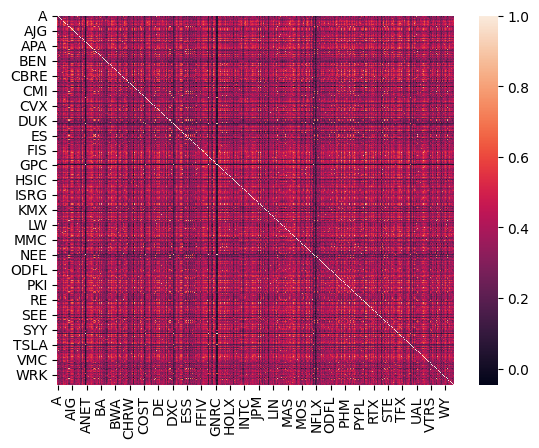

In [42]:
import seaborn as sns 


sns.heatmap(raw_corr)

<AxesSubplot: >

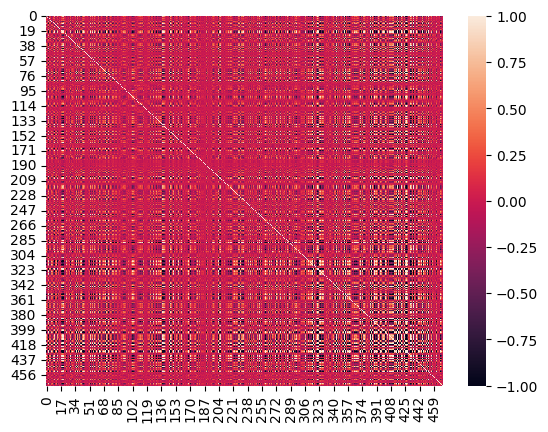

In [43]:
sns.heatmap(clean_corr)

In [9]:
import networkx as nx
import numpy as np
import pandas as pd
from networkx.algorithms import community

def LouvainCorrelationClustering(C_s, resolution): 

    mygraph = nx.from_numpy_array(np.abs(C_s))
    partitions = community.louvain_communities(mygraph, resolution=i)

    
    return partitions


In [55]:
clean_corr = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill").corr().to_numpy(), 470, 2768)

clean_corr = np.array(clean_corr)

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0).to_numpy()
risk_aversion=2
l = []
def do_it(subset):
    
    print(clean_corr.shape)
    r = returns[:, subset]
    op = optimal_weights(r.mean(axis=0)[:, np.newaxis], clean_corr[subset, :][:, subset])
    print("weights shape is ", op.shape, "and retruns shape is", returns.shape)

    a = (r@op)
    op.shape
    
    return np.array(a)

for i in [0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1., 1.05, 1.1, 1.15, 1.2, 1.25, 1.3]: 
    try:
        clustering = LouvainCorrelationClustering(clean_corr, resolution=1)
        print(list(map(len, clustering)))

        ts = np.concatenate([do_it(list(subset)) for subset in clustering], axis=1)

        

        op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
        a = pd.DataFrame( np.cumprod((ts+1)@op), index=portfolio.data.index, columns=[f"louvain_{i}"])
        l.append(a)

        a.plot()
    except:
        pass
    

[{1, 4, 5, 262, 7, 264, 9, 267, 270, 14, 274, 19, 276, 21, 278, 280, 25, 28, 29, 30, 31, 287, 288, 35, 292, 36, 39, 41, 43, 44, 45, 300, 47, 303, 50, 51, 52, 53, 55, 57, 58, 59, 64, 65, 66, 328, 73, 75, 76, 77, 80, 81, 82, 83, 336, 85, 86, 91, 92, 93, 96, 97, 100, 101, 103, 105, 362, 106, 112, 113, 115, 116, 117, 118, 119, 379, 125, 388, 134, 135, 136, 393, 398, 142, 144, 145, 146, 151, 161, 165, 168, 169, 173, 174, 175, 180, 181, 182, 185, 186, 187, 444, 188, 192, 193, 451, 453, 199, 200, 466, 467, 213, 218, 232, 240, 243, 244, 249, 250, 254}, {0, 2, 3, 6, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 26, 27, 32, 33, 34, 37, 38, 40, 42, 46, 48, 49, 54, 56, 60, 61, 62, 63, 67, 68, 69, 70, 71, 72, 74, 78, 79, 84, 87, 88, 89, 90, 94, 95, 98, 99, 102, 104, 107, 108, 109, 110, 111, 114, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 137, 138, 139, 140, 141, 143, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 166, 167, 170, 171, 172, 1

[{0, 2, 3, 8, 10, 11, 12, 13, 15, 17, 18, 22, 23, 24, 27, 33, 34, 37, 38, 40, 42, 46, 48, 49, 54, 56, 61, 62, 63, 67, 68, 69, 70, 72, 78, 84, 87, 89, 90, 94, 98, 99, 102, 107, 108, 109, 111, 120, 121, 122, 123, 124, 127, 128, 129, 130, 131, 132, 133, 137, 138, 139, 140, 143, 147, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 162, 163, 164, 166, 170, 171, 172, 176, 178, 179, 183, 184, 189, 190, 191, 194, 195, 196, 197, 198, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 238, 239, 242, 245, 246, 247, 248, 251, 252, 256, 257, 258, 259, 260, 263, 265, 266, 268, 269, 271, 273, 275, 277, 279, 281, 282, 283, 284, 285, 286, 289, 290, 291, 293, 294, 295, 296, 297, 298, 299, 301, 302, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 320, 321, 322, 324, 325, 326, 327, 329, 330, 331, 332, 333, 334, 335, 337, 338, 339, 340, 341, 343, 344, 346, 347, 348, 349, 350,

[{1, 3, 4, 5, 6, 7, 9, 14, 15, 16, 19, 20, 21, 22, 25, 26, 28, 29, 30, 31, 32, 35, 36, 39, 41, 43, 44, 45, 47, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 64, 65, 66, 70, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 88, 91, 92, 93, 95, 96, 97, 100, 101, 103, 104, 105, 106, 110, 112, 113, 115, 116, 117, 118, 119, 122, 125, 126, 134, 135, 136, 138, 141, 142, 144, 145, 146, 151, 155, 157, 161, 165, 167, 168, 169, 173, 174, 175, 180, 181, 182, 185, 186, 187, 188, 192, 193, 199, 200, 204, 205, 213, 218, 220, 229, 232, 236, 240, 243, 244, 249, 250, 253, 254, 255, 258, 261, 262, 264, 267, 270, 272, 274, 276, 278, 280, 287, 288, 291, 292, 300, 303, 317, 323, 328, 336, 338, 342, 345, 362, 379, 388, 390, 393, 398, 407, 414, 415, 444, 445, 451, 453, 464, 465, 466, 467}, {2, 275, 405, 424, 191}, {266, 10, 12, 273, 17, 277, 279, 24, 23, 290, 37, 40, 298, 42, 302, 304, 48, 49, 309, 54, 310, 312, 61, 319, 67, 326, 71, 331, 333, 339, 84, 347, 94, 351, 352, 354, 99, 98, 357, 358, 359, 364, 108, 109,

[{337, 223}, {129, 130, 132, 74, 205, 367, 210, 212, 245, 150, 56, 123, 191}, {1, 9, 141, 270, 16, 145, 144, 148, 277, 278, 280, 152, 412, 157, 30, 288, 162, 36, 294, 44, 174, 177, 178, 180, 54, 314, 59, 319, 193, 451, 196, 68, 71, 200, 202, 331, 75, 333, 206, 79, 465, 209, 84, 214, 219, 94, 222, 352, 224, 99, 100, 101, 113, 241, 248, 379, 381, 126, 127}, {273, 418, 339, 290, 40}, {4, 6, 7, 262, 10, 267, 14, 17, 19, 276, 20, 23, 26, 28, 29, 31, 292, 39, 43, 300, 45, 47, 49, 50, 52, 53, 55, 58, 61, 65, 73, 76, 80, 81, 82, 83, 88, 91, 92, 93, 96, 97, 98, 103, 104, 105, 109, 112, 114, 115, 116, 117, 118, 122, 134, 135, 136, 140, 142, 146, 151, 156, 167, 169, 173, 181, 182, 184, 185, 186, 187, 199, 218, 228, 232, 237, 243, 249, 254}, {3, 5, 261, 264, 15, 271, 274, 21, 22, 25, 27, 286, 287, 35, 291, 41, 303, 51, 311, 57, 317, 62, 64, 66, 72, 77, 336, 338, 85, 86, 89, 90, 95, 362, 107, 106, 110, 111, 119, 120, 125, 388, 138, 398, 153, 155, 414, 415, 161, 165, 168, 171, 172, 175, 188, 445, 19

In [45]:
raw_corr

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.315838,0.301800,0.473025,0.377988,0.355773,0.572527,0.591114,0.545132,0.561943,...,0.360416,0.294357,0.368391,0.416116,0.546470,0.412449,0.466362,0.477506,0.429184,0.516538
AAL,0.315838,1.000000,0.280962,0.278760,0.183494,0.241095,0.240254,0.325953,0.253576,0.361275,...,0.418142,0.111724,0.332560,0.316203,0.390250,0.324927,0.373236,0.288955,0.447289,0.245624
AAP,0.301800,0.280962,1.000000,0.270812,0.261516,0.285977,0.301845,0.357023,0.284791,0.328964,...,0.267787,0.284384,0.293480,0.301757,0.380888,0.338043,0.308479,0.290438,0.352479,0.304858
AAPL,0.473025,0.278760,0.270812,1.000000,0.274750,0.286929,0.437295,0.513590,0.537360,0.541959,...,0.343961,0.283735,0.316849,0.311147,0.417349,0.360114,0.372625,0.443271,0.323107,0.440490
ABBV,0.377988,0.183494,0.261516,0.274750,1.000000,0.385237,0.444365,0.366265,0.317906,0.327527,...,0.238229,0.259607,0.306612,0.329207,0.316338,0.267065,0.366414,0.272323,0.277427,0.415290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.412449,0.324927,0.338043,0.360114,0.267065,0.288937,0.381604,0.471999,0.389206,0.412971,...,0.351327,0.330522,0.359951,0.349310,0.440355,1.000000,0.416501,0.336970,0.373123,0.395438
ZBH,0.466362,0.373236,0.308479,0.372625,0.366414,0.351922,0.472219,0.501266,0.373748,0.440096,...,0.410802,0.277761,0.431313,0.499469,0.450446,0.416501,1.000000,0.353175,0.442394,0.411619
ZBRA,0.477506,0.288955,0.290438,0.443271,0.272323,0.272415,0.399558,0.481622,0.442631,0.496859,...,0.357866,0.183153,0.325007,0.276421,0.437716,0.336970,0.353175,1.000000,0.382736,0.406654
ZION,0.429184,0.447289,0.352479,0.323107,0.277427,0.339166,0.344549,0.464672,0.276203,0.448269,...,0.430331,0.166130,0.521273,0.441984,0.513841,0.373123,0.442394,0.382736,1.000000,0.288926


In [46]:
from tqdm import tqdm
clustering = LouvainCorrelationClustering(raw_corr.to_numpy())

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0).to_numpy()

raw_corr, clean_corr = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill"))

def do_it(subset):
    
    print(raw_corr.to_numpy().shape)
    r = returns[:, subset]
    op = optimal_weights(r.mean(axis=0)[:, np.newaxis], raw_corr.to_numpy()[subset, :][:, subset])
    print("weights shape is ", op.shape, "and retruns shape is", returns.shape)

    a = (r@op)
    op.shape
    
    return np.array(a)



ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

ts.shape
            
    

             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     1.000000  0.315838  0.301800  0.473025  0.377988  0.355773  0.572527   
AAL   0.315838  1.000000  0.280962  0.278760  0.183494  0.241095  0.240254   
AAP   0.301800  0.280962  1.000000  0.270812  0.261516  0.285977  0.301845   
AAPL  0.473025  0.278760  0.270812  1.000000  0.274750  0.286929  0.437295   
ABBV  0.377988  0.183494  0.261516  0.274750  1.000000  0.385237  0.444365   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.412449  0.324927  0.338043  0.360114  0.267065  0.288937  0.381604   
ZBH   0.466362  0.373236  0.308479  0.372625  0.366414  0.351922  0.472219   
ZBRA  0.477506  0.288955  0.290438  0.443271  0.272323  0.272415  0.399558   
ZION  0.429184  0.447289  0.352479  0.323107  0.277427  0.339166  0.344549   
ZTS   0.516538  0.245624  0.304858  0.440490  0.415290  0.361821  0.547980   

           ACN      ADBE       ADI  ...      WYNN       XEL    

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 267.04it/s]

(470, 470)
(5, 1) (5, 5)
[[1.32751794]]
[[-0.99937106]]
-0.7528117187707172
weights shape is  (5, 1) and retruns shape is (2768, 470)
(470, 470)
(137, 1) (137, 137)
[[3.97481527]]
[[-1.0002646]]
-0.2516505875147185
weights shape is  (137, 1) and retruns shape is (2768, 470)
(470, 470)
(2, 1) (2, 2)
[[1.30883985]]
[[-1.00015168]]
-0.7641513051344485
weights shape is  (2, 1) and retruns shape is (2768, 470)
(470, 470)
(34, 1) (34, 34)
[[2.29326724]]
[[-0.99951856]]
-0.4358491431165218
weights shape is  (34, 1) and retruns shape is (2768, 470)
(470, 470)
(26, 1) (26, 26)
[[2.70510238]]
[[-0.99934522]]
-0.3694297223641189
weights shape is  (26, 1) and retruns shape is (2768, 470)
(470, 470)
(112, 1) (112, 112)
[[9.40075173]]
[[-1.06641864]]
-0.11343972001173754
weights shape is  (112, 1) and retruns shape is (2768, 470)
(470, 470)
(21, 1) (21, 21)
[[2.62533405]]
[[-0.99960157]]
-0.38075214493959414
weights shape is  (21, 1) and retruns shape is (2768, 470)
(470, 470)
(121, 1) (121, 121)
[[

(2768, 12)

(12, 1) (12, 12)
[[2.46653483]]
[[-1.00509802]]
-0.4074939494810485


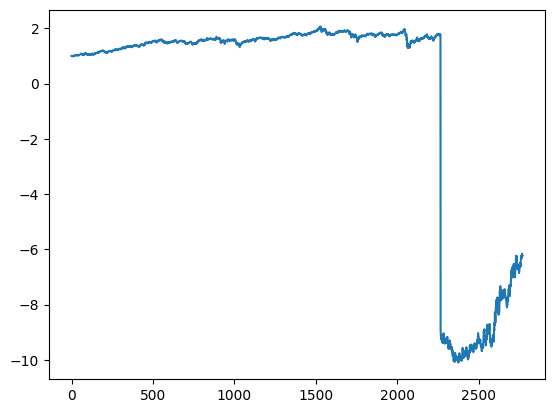

In [47]:


#raw_corr, _ = compute_clean_correlation_matrix(ts)

op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
a = np.cumprod((ts+1)@op)

plt.plot(a)


In [72]:
from tqdm import tqdm

risk_aversion=1

raw_corr, clean_corr = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill"))

clean_corr = np.array(clean_corr)

clustering = LouvainCorrelationClustering(clean_corr)

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0).to_numpy()



def do_it(subset):
    
    print(clean_corr.shape)
    r = returns[:, subset]
    op = optimal_weights(r.mean(axis=0)[:, np.newaxis], clean_corr[subset, :][:, subset])
    print("weights shape is ", op.shape, "and retruns shape is", returns.shape)

    a = (r@op)
    op.shape
    
    return np.array(a)



ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

ts.shape
            

             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     1.000000  0.315838  0.301800  0.473025  0.377988  0.355773  0.572527   
AAL   0.315838  1.000000  0.280962  0.278760  0.183494  0.241095  0.240254   
AAP   0.301800  0.280962  1.000000  0.270812  0.261516  0.285977  0.301845   
AAPL  0.473025  0.278760  0.270812  1.000000  0.274750  0.286929  0.437295   
ABBV  0.377988  0.183494  0.261516  0.274750  1.000000  0.385237  0.444365   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.412449  0.324927  0.338043  0.360114  0.267065  0.288937  0.381604   
ZBH   0.466362  0.373236  0.308479  0.372625  0.366414  0.351922  0.472219   
ZBRA  0.477506  0.288955  0.290438  0.443271  0.272323  0.272415  0.399558   
ZION  0.429184  0.447289  0.352479  0.323107  0.277427  0.339166  0.344549   
ZTS   0.516538  0.245624  0.304858  0.440490  0.415290  0.361821  0.547980   

           ACN      ADBE       ADI  ...      WYNN       XEL    


100%|███████████████████████████████████████████████████████████████████████████████| 131/131 [00:00<00:00, 724.96it/s]

(470, 470)
(2, 1) (2, 2)
[[3.81563372]]
[[-1.00156346]]
-0.2624894152868587
weights shape is  (2, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99946221]]
-0.999462209899197
weights shape is  (1, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99928427]]
-0.9992842680911869
weights shape is  (1, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99957468]]
-0.9995746754773028
weights shape is  (1, 1) and retruns shape is (2768, 470)
(470, 470)
(5, 1) (5, 5)
[[-45.48904967]]
[[-1.01585932]]
0.022331953033681212
weights shape is  (5, 1) and retruns shape is (2768, 470)
(470, 470)
(5, 1) (5, 5)
[[10.52113943]]
[[-0.9970766]]
-0.09476888034253757
weights shape is  (5, 1) and retruns shape is (2768, 470)
(470, 470)
(41, 1) (41, 41)
[[29.19630898]]
[[-0.99450873]]
-0.03406282380823938
weights shape is  (41, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99974247]]
-0.999742470875227
weights sh

(2768, 131)

(11, 1) (11, 11)
[[3.18809266]]
[[-0.99868754]]
-0.31325549380357015


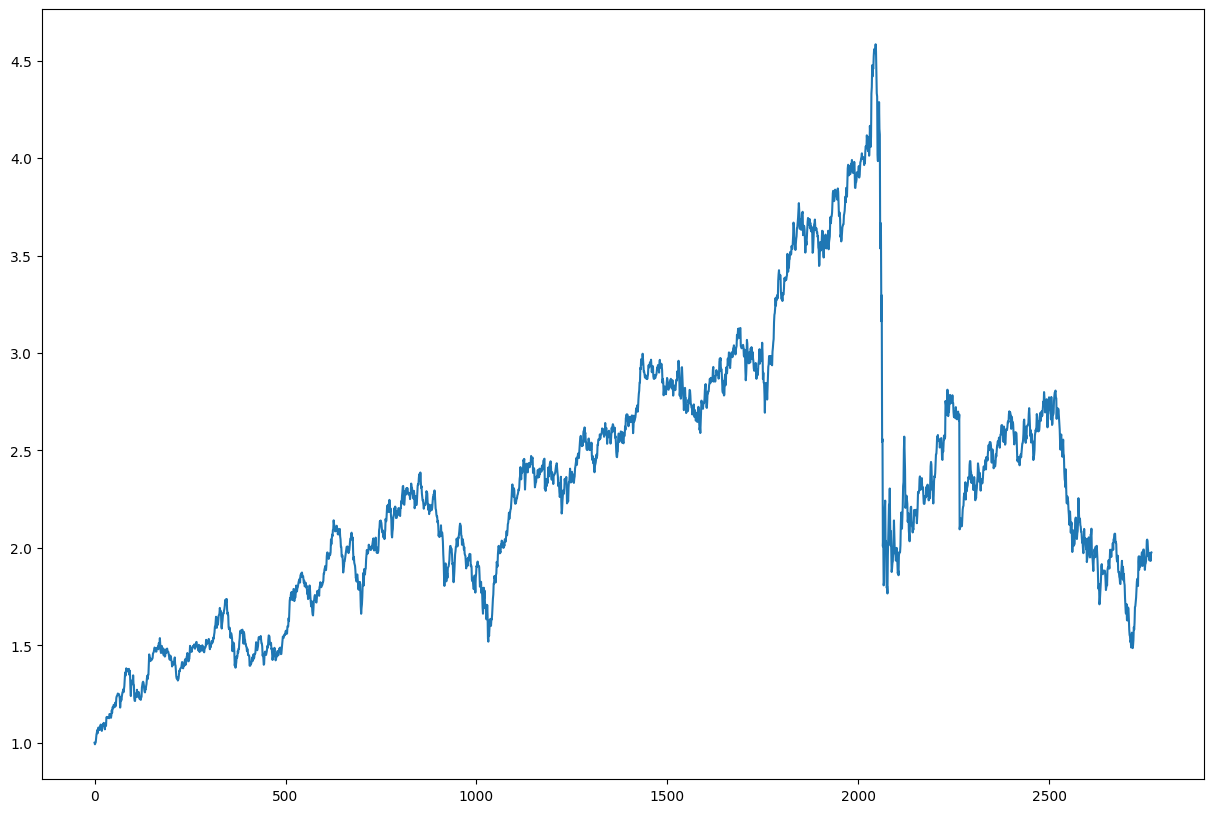

In [70]:

op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
a = np.cumprod((ts+1)@op)

plt.plot(a)

In [35]:
a = pd.read_csv("data/us-stocks.csv")
a = a.dropna(axis=0, thresh=int(0.1*a.shape[1])).dropna(axis=1, thresh=int(0.1*a.shape[0]))
a

,Unnamed: 0,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,...,SGR,LIZ,DT,ABK,ID,CAE,TKS,BMT,AG,TBL
8340,8341,151.19,0.88,13.08,1.12,2.95,2.66,2.00,2.88,2.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8341,8342,150.66,0.88,13.00,1.14,2.98,2.70,1.96,2.85,2.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8342,8343,152.81,0.91,13.26,1.15,3.07,2.88,2.00,2.89,2.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8343,8344,153.37,0.90,13.28,1.16,3.07,2.88,2.02,2.87,2.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8344,8345,152.67,0.90,13.26,1.17,3.16,2.88,1.97,2.83,2.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16287,1868.20,25.76,186.22,81.38,124.43,96.82,12.17,29.59,66.43,...,355.0,27.68,NaN,0.41,NaN,13.59,5.91,NaN,11.14,8000.0
16287,16288,1846.34,25.34,183.90,79.93,121.89,95.61,11.86,28.91,65.71,...,355.0,27.50,NaN,0.42,NaN,13.48,6.00,NaN,11.50,8000.0
16288,16289,1841.13,25.11,182.21,80.07,123.11,95.39,11.84,29.07,65.77,...,355.0,26.88,NaN,NaN,NaN,13.38,6.04,NaN,11.53,8000.0
16289,16290,1858.83,25.43,185.81,81.39,125.42,95.67,11.90,29.48,66.38,...,370.0,27.05,NaN,0.42,NaN,13.35,6.08,NaN,11.16,8000.0


In [27]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903


In [59]:
data =  ((portfolio.data.diff()/portfolio.data)).fillna(0)

In [64]:
for time_period in tqdm(np.split(data.to_numpy(), np.arange(100, data.shape[0], 100))):
    
    dtw.distance_matrix(time_period.T, only_triu=True, use_c=True, parallel=True, show_progress=True)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:27<00:00,  1.03it/s]


In [17]:
from dtaidistance import dtw

da
ds = dtw.distance_matrix(data.to_numpy().T, only_triu=True, use_c=True, parallel=True, show_progress=True)
ds

array([[       inf, 1.13333583, 0.76874758, ..., 0.83835698, 0.70454819,
        0.58087342],
       [       inf,        inf, 1.16879652, ..., 1.17818988, 1.08183983,
        1.1547224 ],
       [       inf,        inf,        inf, ..., 0.8307227 , 0.84438631,
        0.74408932],
       ...,
       [       inf,        inf,        inf, ...,        inf, 0.88736917,
        0.81170198],
       [       inf,        inf,        inf, ...,        inf,        inf,
        0.73102395],
       [       inf,        inf,        inf, ...,        inf,        inf,
               inf]])

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True, False]])

array([[0.        , 1.13333583, 0.76874758, ..., 0.83835698, 0.70454819,
        0.58087342],
       [1.13333583, 0.        , 1.16879652, ..., 1.17818988, 1.08183983,
        1.1547224 ],
       [0.76874758, 1.16879652, 0.        , ..., 0.8307227 , 0.84438631,
        0.74408932],
       ...,
       [0.83835698, 1.17818988, 0.8307227 , ..., 0.        , 0.88736917,
        0.81170198],
       [0.70454819, 1.08183983, 0.84438631, ..., 0.88736917, 0.        ,
        0.73102395],
       [0.58087342, 1.1547224 , 0.74408932, ..., 0.81170198, 0.73102395,
        0.        ]])

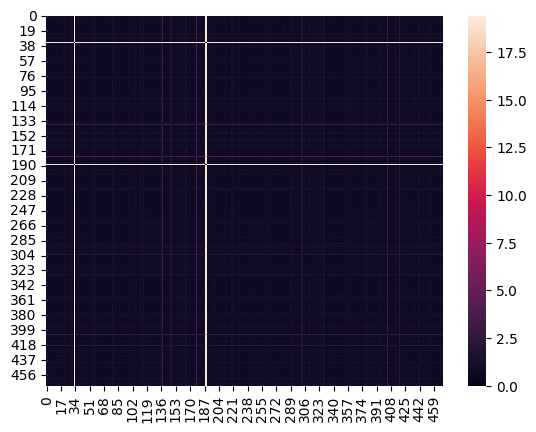

In [24]:
import numpy as np
import seaborn as sns

np.fill_diagonal(ds, 0)
ds[ds == np.inf] = 0
ds_ = np.copy(ds)
ds_ = ds_ + ds_.T
sns.heatmap(ds_)
ds_

<AxesSubplot: xlabel='Date'>

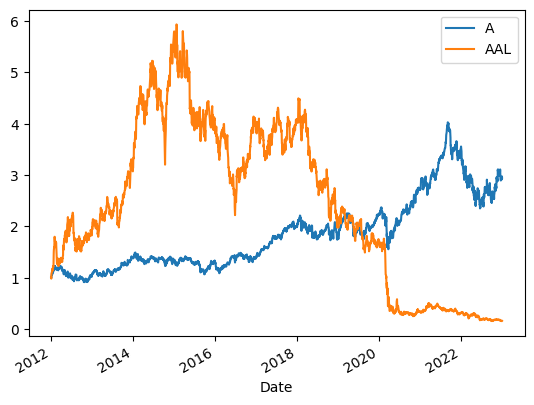

In [57]:
_returns.iloc[:, 0:2].cumprod().plot()

<AxesSubplot: ylabel='Frequency'>

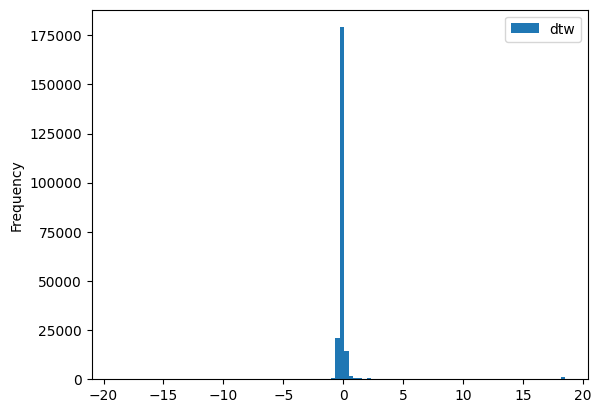

In [28]:
import pandas as pd

w = (ds_ - ds_.mean(axis=1)).reshape(-1)
pd.DataFrame(w, columns=["dtw"]).plot(kind="hist", bins=100)

In [37]:
dist_2_sim = 1/ds_
np.fill_diagonal(dist_2_sim, 0)

C:\Users\user\AppData\Local\Temp\ipykernel_10960\1508931032.py:1: RuntimeWarning: divide by zero encountered in divide
  dist_2_sim = 1/ds_


<AxesSubplot: ylabel='Frequency'>

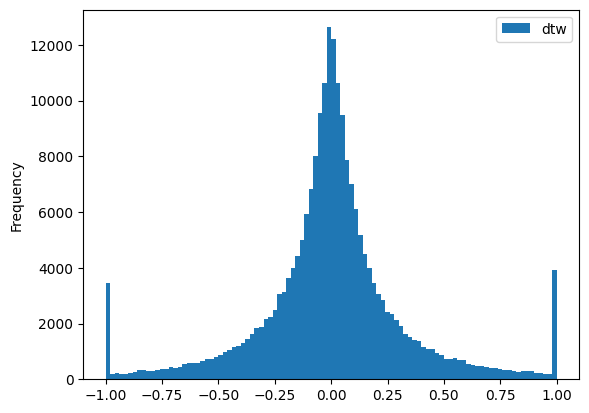

In [41]:
pd.DataFrame(clean_corr.reshape(-1), columns=["dtw"]).plot(kind="hist", bins=100)

<AxesSubplot: ylabel='Frequency'>

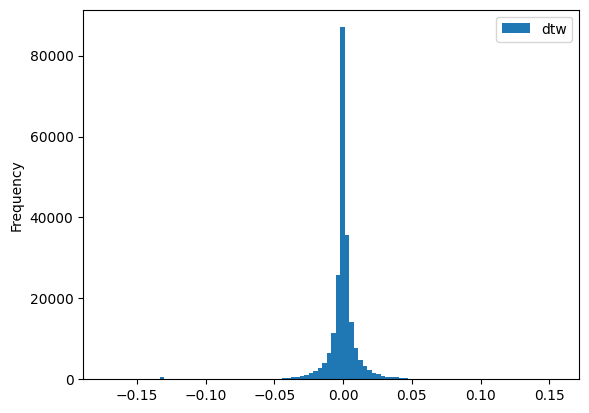

In [54]:
signed_dtw = (dist_2_sim - dist_2_sim.mean())/np.max(np.abs(dist_2_sim)) * (clean_corr)
pd.DataFrame(signed_dtw.reshape(-1), columns=["dtw"]).plot(kind="hist", bins=100)

0.11697467009189476


array([[ 4.59435799e-03],
       [ 2.79476874e-03],
       [ 4.12328933e-02],
       [ 7.22508239e-03],
       [-3.63122918e-03],
       [-4.79048754e-03],
       [-2.24630332e-02],
       [ 2.51992950e-03],
       [ 3.16927794e-03],
       [ 9.68257445e-03],
       [-3.67556927e-03],
       [ 9.68557518e-04],
       [-2.82094305e-03],
       [-7.86072631e-03],
       [-1.21858059e-02],
       [ 4.23790115e-04],
       [ 1.58536674e-02],
       [ 8.85088862e-03],
       [-2.87529858e-02],
       [ 6.10841780e-03],
       [-2.56206988e-02],
       [-1.68887496e-03],
       [ 1.29223235e-02],
       [-9.37880797e-03],
       [ 6.11843351e-03],
       [-1.93535586e-03],
       [-3.22568951e-03],
       [ 4.75833306e-03],
       [ 1.56831879e-02],
       [ 1.42503989e-02],
       [ 1.84622564e-03],
       [ 7.50170696e-03],
       [-8.56009410e-03],
       [ 2.29184245e-02],
       [-5.46438979e-03],
       [-1.04076324e-02],
       [-3.68935260e-03],
       [ 1.26663538e-02],
       [ 9.0

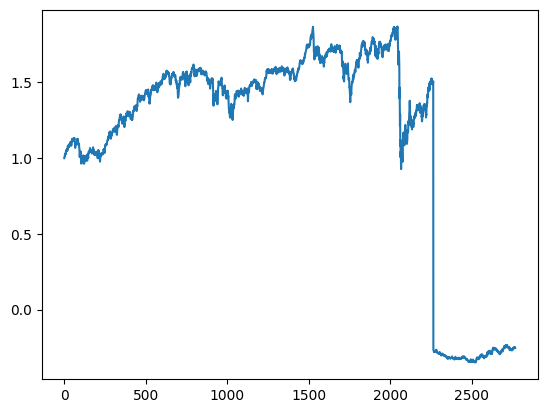

In [55]:
import matplotlib.pyplot as plt

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
print(returns.mean(axis=0).sum())
op = optimal_weights(returns.mean(axis=0).to_numpy()[:, np.newaxis], signed_dtw)
_returns = ((portfolio.data.diff()/portfolio.data) + 1).fillna(1)
a_ = np.cumprod((_returns.to_numpy()@op))

plt.plot(a_)
op

In [53]:
from utils import compute_clean_correlation_matrix
import numpy as np
from tqdm import tqdm


#clean_corr = compute_clean_correlation_matrix(returns.corr().fillna(0))
#returns = returns

l = []

for i in tqdm(range(1500, len(returns), 10), leave=False, position=0): 
    
    returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
    c = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill").corr().to_numpy(), 470, 2768)
    c = np.array(c)
    
    fa = LouvainCorrelationClustering(c, resolution=1)
    print(len(fa))

    #ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

    #ts.shape

    #op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
    #a = pd.DataFrame( np.cumprod((ts+1)@op), index=portfolio.data.index, columns=[f"louvain_{i}"])
    #l.append(a)

    #a.plot()


    

  1%|▋                                                                                 | 1/127 [00:03<07:43,  3.68s/it]

470


  2%|█▎                                                                                | 2/127 [00:07<07:43,  3.71s/it]

470


KeyboardInterrupt: 

In [44]:
returns = portfolio.returns
c = compute_clean_correlation_matrix(returns.corr().fillna(0).to_numpy(), returns.shape[1],  returns.shape[0])
c = np.array(c)
np.fill_diagonal(c, 0)
c = np.array(c)
print(c)
print(len(LouvainCorrelationClustering(c, 1)))

[[ 0.          0.04199558 -0.78237647 ... -0.54491832 -0.25893543
  -0.0626062 ]
 [ 0.04199558  0.         -0.08704632 ... -0.03499045 -0.0243285
   0.04687814]
 [-0.78237647 -0.08704632  0.         ...  0.89084554  0.39842716
  -0.00870567]
 ...
 [-0.54491832 -0.03499045  0.89084554 ...  0.          0.32385729
   0.02385482]
 [-0.25893543 -0.0243285   0.39842716 ...  0.32385729  0.
  -0.08833983]
 [-0.0626062   0.04687814 -0.00870567 ...  0.02385482 -0.08833983
   0.        ]]
470


<AxesSubplot: ylabel='Frequency'>

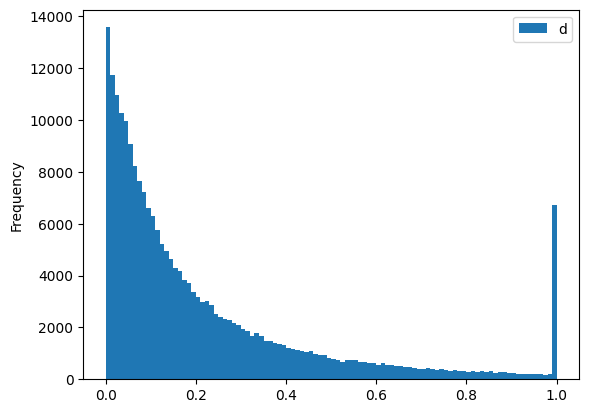

In [46]:
pd.DataFrame(np.abs(c).reshape(-1, 1), columns=["d"]).plot(kind="hist", bins=100)

In [ ]:
from sklearn.metrics import ARI

plt.plot([ARI(x, y) for x, y in zip(l[:-1], l[1:])])
